In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sachinkumar1609/Data-Analyst-Portfolio-Projects/main/Data%20Analysis%20on%20Hotel%20Booking/hotel_bookings%202.csv")


In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
df.describe(include = 'object')


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
df['is_canceled'].unique()

array([0, 1])

From this We can See that there are 2 values given to the Column is_canceled which are 0 and 1. 0 for not canceled and 1 for cancelling respectively

In [11]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

This Code gives ous the output of the code as all the unique values of the particular column respectively.

In [12]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['company','agent'],axis = 1, inplace = True)
df.dropna(inplace = True)

this code is used to delete all the rows which consist all the null values


In [14]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
df = df[df['adr']<5000]


Data Analysis and Visualizations


0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


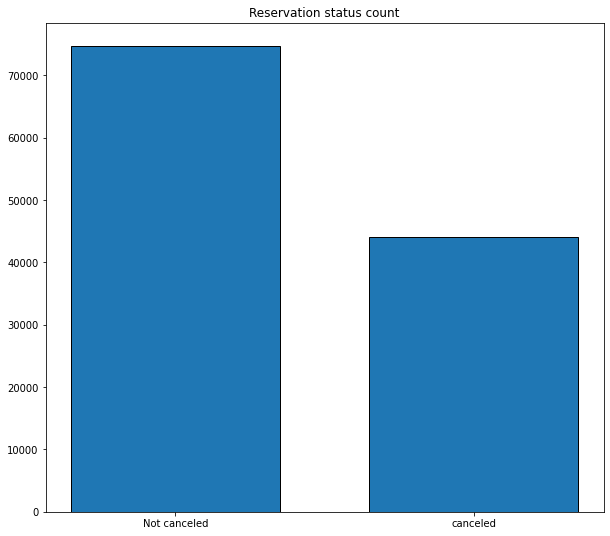

In [17]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (10,9))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()


In [18]:
df['cancelled_perc'] = df['is_canceled'].mean() * 100


In [19]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Not Canceled', 'Canceled'],
    y=[len(df[df['is_canceled']==0]), len(df[df['is_canceled']==1])],
    name='Number of Bookings'
))
fig.add_trace(go.Bar(
    x=['Canceled'],
    y=[df['cancelled_perc'].mean()],
    name='Canceled Percentage',
    marker_color='purple'
))
fig.update_layout(barmode='group')
fig.show()

From the above analysis, we can conclude that most of the Bookings booked are not cancelled and also the conversion rate is pretty good.


Text(0, 0.5, 'number of reservations')

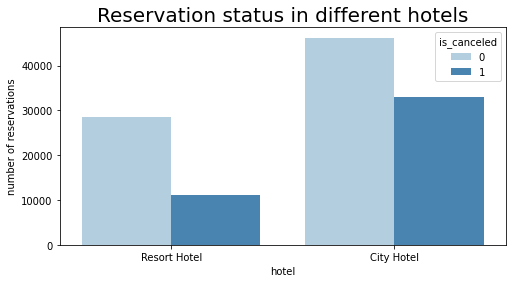

In [20]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled',data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

From this analysis, we can analyze that the no. of cancelled city hotels is comparitavely higher than that of the Resort Hotels


In [21]:
counts = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')


In [22]:
import plotly.express as px

counts = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')

fig = px.bar(counts, x='hotel', color='is_canceled', barmode='group',
             title='Reservation status in different hotels', 
             labels={'hotel': 'Hotel', 'is_canceled': 'Canceled'},
             hover_data={'hotel': False, 'is_canceled': False, 'count': True})
fig.update_layout(xaxis_title=None, yaxis_title='Number of reservations')
fig.show()


In [23]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [24]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

From the above 2 analysis, we can observe that the cancellation rate in the **resort hotel** is around 73% and **City hotel** is around 59%

In [25]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

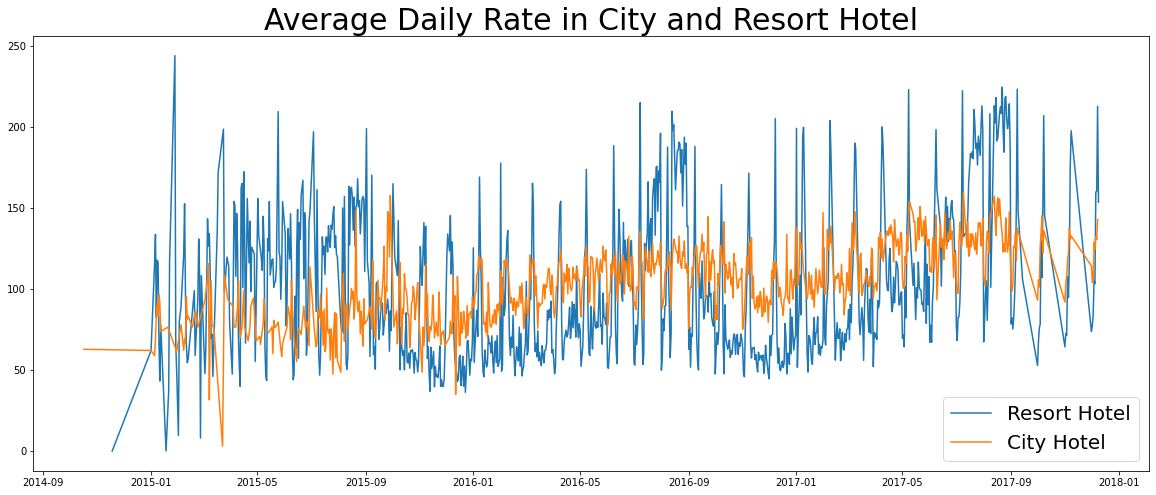

In [26]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [27]:
resort_hotel_indices = resort_hotel.index
city_hotel_indices = city_hotel.index

resort_hotel_adr = resort_hotel['adr']
city_hotel_adr = city_hotel['adr']
print(resort_hotel_indices)
print(city_hotel_indices)
print(resort_hotel_adr)



print(city_hotel_adr)


DatetimeIndex(['2014-11-18', '2015-01-01', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2017-11-08', '2017-12-01', '2017-12-02', '2017-12-03',
               '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-09'],
              dtype='datetime64[ns]', name='reservation_status_date', length=913, freq=None)
DatetimeIndex(['2014-10-17', '2015-01-01', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2017-11-07', '2017-11-08', '2017-12-01', '2017-12-02',
               '2017-12-03', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08'],
              dtype='datetime64[ns]', name='reservation_status_date', length=864, freq=None)
reservation_status_date
2014-11-18

In [28]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(
    x=resort_hotel.index,
    y=city_hotel.index,
    z=resort_hotel['adr'],
    mode='lines',
    name='Resort Hotel'
), go.Scatter3d(
    x=city_hotel.index,
    y=resort_hotel.index,
    z=city_hotel['adr'],
    mode='lines',
    name='City Hotel'
)])

fig.update_layout(title='Average Daily Rate in City and Resort Hotel',
                  scene=dict(xaxis_title='Day', yaxis_title='Day', zaxis_title='ADR'),
                  height=800, width=800)
fig.show()


In this output, X and Y are the indices of resort_hotel and City_hotrl respectively and z is the ADR value of the day

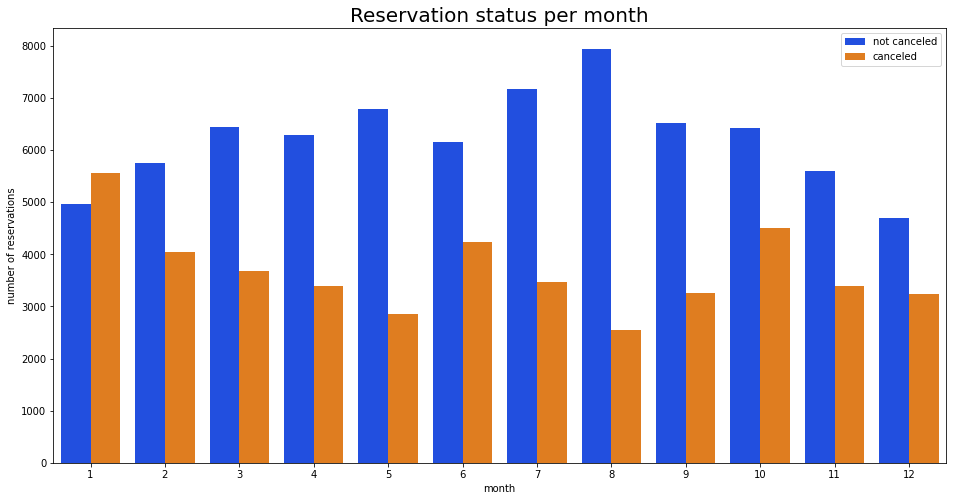

In [29]:
df['month'] =df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month',hue = 'is_canceled',data = df,palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status per month',size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()


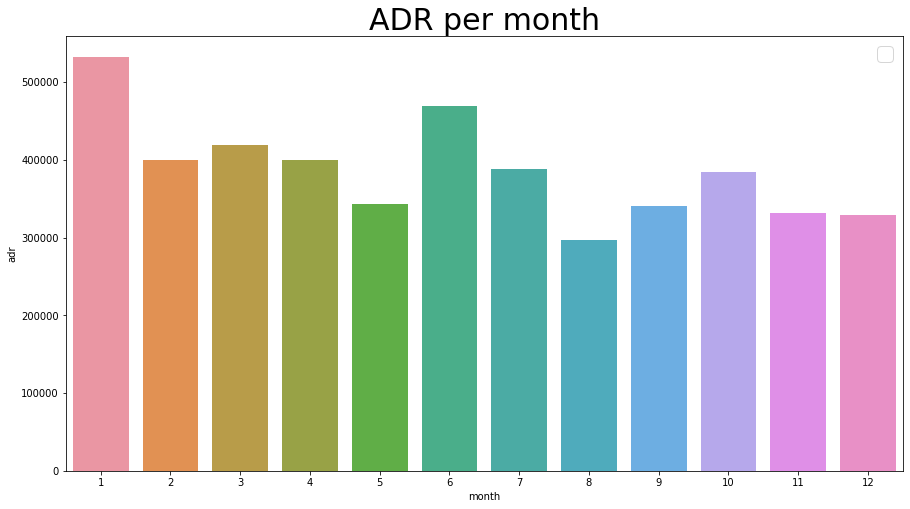

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)

sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())

plt.legend(fontsize=20)
plt.show()


In [31]:
import plotly.express as px

fig = px.bar(df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(),
x='month', y='adr', color='month',
labels={'month': 'Month', 'adr': 'ADR'},
title='ADR per month')
fig.update_layout(xaxis_title=None, yaxis_title='Total ADR', legend_title=None)
fig.show()

From the above analysis we can conclude that the most ADR is received in the month of January(532.6605K) and Least ADR is received in the Month of August(296.665K). Basically we see that Month of January Gives more ADR and Hence more Revenue To the Hotels due to various Reasons like New Year, SnowFalls, Festivals etc

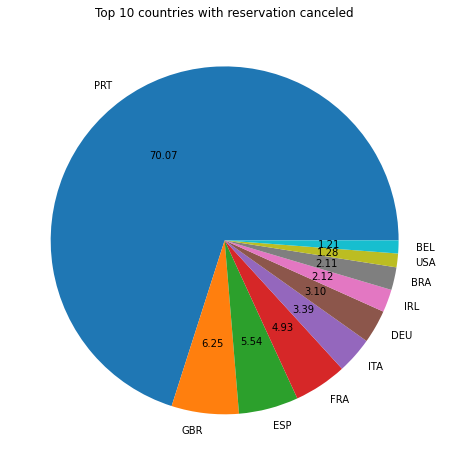

In [32]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()


In [33]:
df['market_segment'].value_counts()



Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

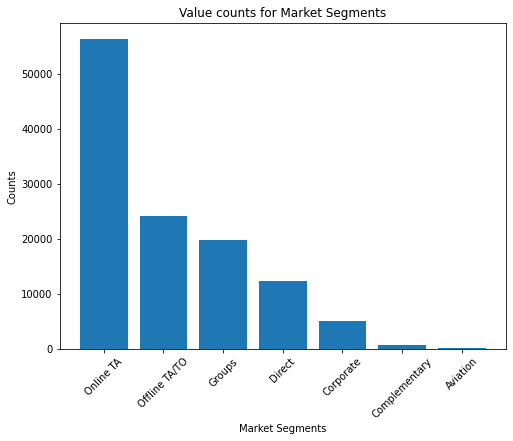

In [34]:
import matplotlib.pyplot as plt

segment_counts = df['market_segment'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(segment_counts.index, segment_counts.values)

ax.set_title('Value counts for Market Segments')
ax.set_xlabel('Market Segments')
ax.set_ylabel('Counts')

plt.xticks(rotation=45)

plt.show()


here We can confirm the what we got from the above 2 results that online TA is the most values and most effective in the market segment

In [35]:
df['market_segment'].value_counts(normalize = True)


Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

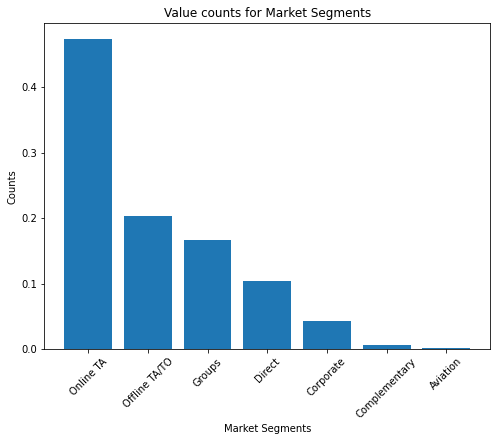

In [36]:
import matplotlib.pyplot as plt

segment_counts = df['market_segment'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(segment_counts.index, segment_counts.values)

ax.set_title('Value counts for Market Segments')
ax.set_xlabel('Market Segments')
ax.set_ylabel('Counts')

plt.xticks(rotation=45)

plt.show()

In [37]:
import plotly.express as px

# Get the value counts for 'market_segment' column
segment_counts = df['market_segment'].value_counts().reset_index()

# Rename the columns
segment_counts.columns = ['Market Segment', 'Count']

# Create a bar chart using plotly express
fig = px.bar(segment_counts, x='Market Segment', y='Count',
             title='Value counts for Market Segments')

# Add the hover data to display the count value on hovering
fig.update_traces(hovertemplate='Count: %{y}')

# Show the plot
fig.show()


In [38]:
import plotly.express as px

segment_counts = df['market_segment'].value_counts(normalize = True).reset_index()

segment_counts.columns = ['Market Segment', 'Count']

fig = px.bar(segment_counts, x='Market Segment', y='Count',
             title='Value counts for Market Segments')

fig.update_traces(hovertemplate='Count: %{y}')

fig.show()

In [39]:
cancelled_data['market_segment'].value_counts(normalize = True)


Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [40]:
import plotly.express as px

segment_counts = cancelled_data['market_segment'].value_counts(normalize = True).reset_index()

segment_counts.columns = ['Market Segment', 'Count']

fig = px.bar(segment_counts, x='Market Segment', y='Count',
             title='Value counts for Market Segments')

fig.update_traces(hovertemplate='Count: %{y}')

fig.show()